## Spectral Representation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from tqdm import tqdm

Για την μέθοδο του Spectral Representation ουσιαστικά πρέπει να χτίσουμε την σχέση $(2.54)$ του βιβλίου, όπου ουσιαστικά τα έχουμε όλα και αρκεί να τα ορίσουμε σωστά.

In [2]:
N = 50 # number of samples
dw = 3 / N # uppercut off frequency after which the power spectrum becomes practically zero

# define the one-sided-power-spectrum (Sx in (2.54))
def G(w):
    if (1 <= w and w <= 2): return w - 1
    elif (2 < w and w <= 3): return 3 - w
    else: return 0

In [3]:
w_n = np.zeros(shape = N)
G_w = np.zeros(shape = N) 
for i in range(N):
    w_n[i] = i * dw
    G_w[i] = G(w_n[i])

steps = 200
t = np.linspace(0, 10, steps)

In [4]:
def simulation(G_w, dw, w_n, t):
    phi_k = np.random.uniform(high = 2 * np.pi, size = N)
    s = np.zeros((N, len(t)))
    for i in range(N):
        s[i, :] = sqrt(G_w[i] * dw) * np.cos(w_n[i] * t + phi_k[i]) #  one-sided
        # s[i, :] = sqrt(2 * G_w[i] * dw) * np.cos(w_n[i] * t + phi_k[i]) #  two-sided
    return sqrt(2) * np.sum(s, axis = 0)

In [5]:
def realization(realizations):
    sim = np.zeros((realizations, len(t)))
    for i in tqdm(range(realizations), total = realizations):
        sim[i, :] = simulation(G_w, dw, w_n, t)
    return sim

In [6]:
real_500 = realization(500)
real_2500 = realization(2500)
real_5000 = realization(5000)
real_10000 = realization(10000)
real_50000 = realization(50000)
real_500000 = realization(500000)

100%|████████████████████████████████████████████████████████████████████████| 500000/500000 [03:31<00:00, 2362.10it/s]


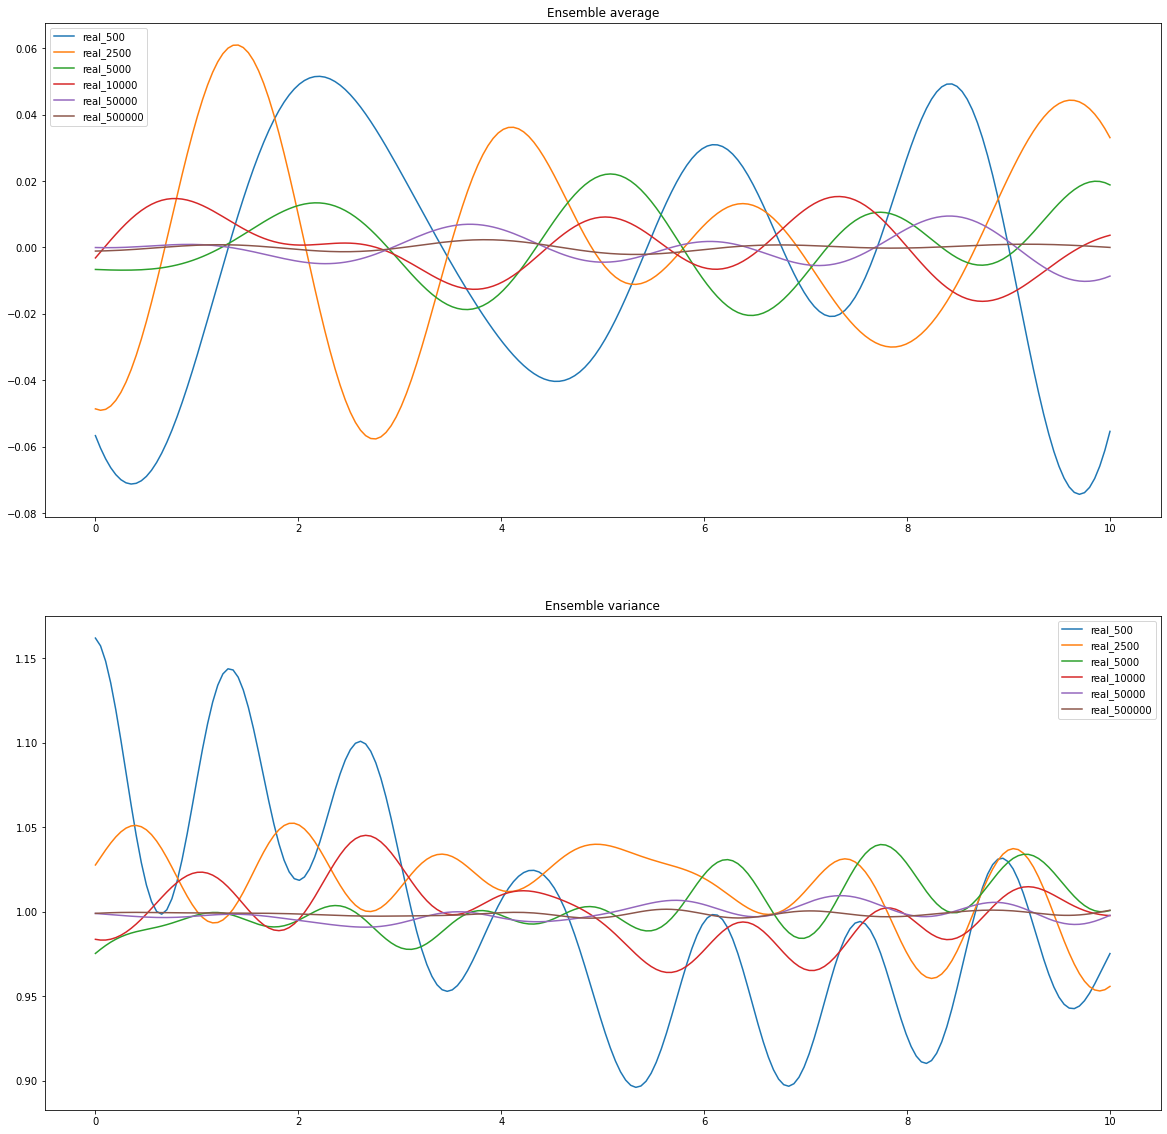

In [7]:
fig, axs = plt.subplots(2, 1, figsize = (20, 20))
data = [real_500, real_2500, real_5000, real_10000, real_50000, real_500000]
names = ["real_500", "real_2500", "real_5000", "real_10000", "real_50000", "real_500000"]
for d, name in zip(data, names):
    mu = np.mean(d, axis = 0)
    var = np.var(d, axis = 0)
    axs[0].plot(t, mu, label = name)
    axs[1].plot(t, var, label = name)
    axs[0].set_title("Ensemble average")
    axs[1].set_title("Ensemble variance")
    axs[0].legend(loc = "best")
    axs[1].legend(loc = "best")
plt.show()

Οι θεωρητικές τιμές είναι 0 και 1 για την μέση τιμή και την διασπορά αντίστοιχα. Η θεωρητική τιμή του variance προκύπτει από το εμβαδόν της δίκλαδης συνάρτησης $G(ω)$ που δίνεται στην εκφώνηση με βάση τον τύπο $(2.44)$ του βιβλίου. Στην πραγματικότητα είναι απλά το εμβαδόν ενός τριγώνου. Παρατηρούμε ότι με την αύξηση των realizations έχουμε σχεδόν τέλεια σύγκλιση τόσο για την μέση τιμή όσο και για την διασπορά. Ωστόσο, στην περίπτωση του Spectral Representation απαιτούνται πάρα πολλά realizations (εδώ $500000$) για να φτάσουμε σε τόσο καλά αποτελέσματα, ωστόσο εν γένει υπάρχει σύγκλιση.

In [8]:
# temporal mean and variance
realizations = 5000
sim = realization(realizations)
mu_r = []
var_r = []
for i in range(realizations): 
    mu_r.append(np.mean(sim[i]))
    var_r.append(np.var(sim[i]))

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:02<00:00, 2378.70it/s]


In [16]:
r_idx = np.random.choice(range(realizations))
print("temporal average of a random single realization: {} \
      \ntemporal variance of a random single realization: {}".format(\
      mu_r[r_idx], var_r[r_idx]))

temporal average of a random single realization: 0.004204855401140631       
temporal variance of a random single realization: 1.2857184717595078


Τα temporal mean και variance είναι αρκετά κοντά εν γένει (ύστερα από αρκετές δοκιμές) στα αντίστοιχα ensemble, το οποίο είναι απόλυτα λογικό διότι η μέθοδος Spectral Represenation παράγει εργόδικες διαδικασίες ως προς το mean και το autocorrelation (συνεπώς και το variance), που πρακτικά είναι ακριβώς αυτή η ιδιότητα (temporal $\approx$ ensemble).

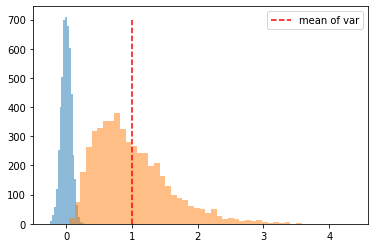

In [10]:
plt.hist(mu_r, bins = 20, alpha = 0.5)
plt.hist(var_r, bins = 50, alpha = 0.5)
plt.vlines(np.mean(var_r), ymin = 0, ymax = 700, colors = "red", label = "mean of var", linestyles = "dashed")
plt.legend()
plt.show()

Στο παραπάνω διάγραμμα έχουμε σχεδιάσει την κατανομή του temporal mean και του temporal variance. Παρατηρούμε ότι η 1η είναι συγκεντρωμένη γύρω από το $0$ και η 2η γύρω από το $1$, το οποίο καταδεικνύεται από την κόκκινη γραμμή που είναι η μέση τιμή του temporal variance. Αυτό επιβεβαιώνει ότι η μέθοδος Spectral Representation παράγει εργοδικές διαδικασίες ως προς το mean και το autocorrelation, αφού οι μετρικές temporal και ensemble συγκλίνουν στις ίδιες τιμές.